<a href="https://colab.research.google.com/github/Anjal1p/Python-practice/blob/master/IMDB_Classifying_Movie_Reviews_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# word_index is a dict mapping words to an integer index
word_index = imdb.get_word_index()
# reverse it, map int indices to word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# dsecoded review
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
# Preparing the data
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero index (add text later)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# vectorized data
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)  

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32') 
y_test  = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [0]:
# Validating our approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.5086 - binary_accuracy: 0.7813 - val_loss: 0.3802 - val_binary_accuracy: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.3007 - binary_accuracy: 0.9051 - val_loss: 0.3007 - val_binary_accuracy: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2181 - binary_accuracy: 0.9279 - val_loss: 0.3084 - val_binary_accuracy: 0.8719
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1751 - binary_accuracy: 0.9435 - val_loss: 0.2839 - val_binary_accuracy: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2847 - val_binary_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1150 - binary_accuracy: 0.9654 - val_loss: 0.3161 - val_bi

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

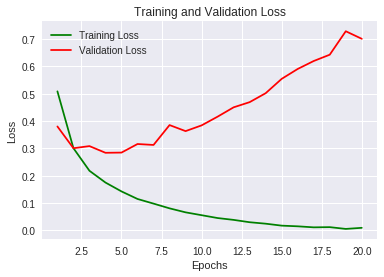

In [22]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

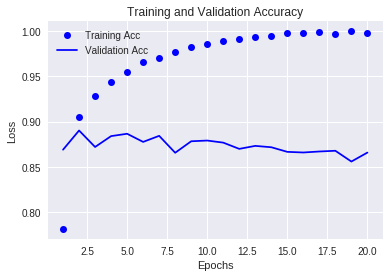

In [23]:
plt.clf() # clears the figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']


plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 3s 101us/step - loss: 0.4739 - acc: 0.8223
Epoch 2/10
25000/25000 [==============================] - 2s 93us/step - loss: 0.2673 - acc: 0.9094
Epoch 3/10
25000/25000 [==============================] - 2s 92us/step - loss: 0.2033 - acc: 0.9286
Epoch 4/10
25000/25000 [==============================] - 2s 92us/step - loss: 0.1713 - acc: 0.9386
Epoch 5/10
25000/25000 [==============================] - 2s 92us/step - loss: 0.1463 - acc: 0.9489
Epoch 6/10
25000/25000 [==============================] - 2s 92us/step - loss: 0.1288 - acc: 0.9551
Epoch 7/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.1110 - acc: 0.9618
Epoch 8/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0989 - acc: 0.9663
Epoch 9/10
25000/25000 [==============================] - 2s 90us/step - loss: 0.0866 - acc: 0.9714
Epoch 10/10
25000/25000 [==============================] - 2s 67us/step


In [25]:
results

[0.4289054811191559, 0.86508]

In [26]:
model.predict(x_test)

array([[0.11311963],
       [0.99999833],
       [0.41549063],
       ...,
       [0.07855248],
       [0.01826392],
       [0.85722345]], dtype=float32)